In [53]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [54]:
dataset = 'C:/Users/rohan/Downloads/hand-gesture-recognition-mediapipe-main/hand-gesture-recognition-mediapipe-main/model/keypoint_classifier/keypoint.csv'
model_save_path = 'C:/Users/rohan/Downloads/hand-gesture-recognition-mediapipe-main/hand-gesture-recognition-mediapipe-main/model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'C:/Users/rohan/Downloads/hand-gesture-recognition-mediapipe-main/hand-gesture-recognition-mediapipe-main/model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [55]:
NUM_CLASSES = 5

# Dataset reading

In [56]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [57]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [59]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [60]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_6 (Dropout)         (None, 42)                0         
                                                                 
 dense_9 (Dense)             (None, 20)                860       
                                                                 
 dropout_7 (Dropout)         (None, 20)                0         
                                                                 
 dense_10 (Dense)            (None, 10)                210       
                                                                 
 dense_11 (Dense)            (None, 5)                 55        
                                                                 
Total params: 1125 (4.39 KB)
Trainable params: 1125 (4.39 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [61]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [62]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [63]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000


 1/31 [..............................] - ETA: 7s - loss: 1.6089 - accuracy: 0.2188
Epoch 1: saving model to C:/Users/rohan/Downloads/hand-gesture-recognition-mediapipe-main/hand-gesture-recognition-mediapipe-main/model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 4ms/step - loss: 1.5305 - accuracy: 0.2998 - val_loss: 1.4313 - val_accuracy: 0.3634
Epoch 2/1000
 1/31 [..............................] - ETA: 0s - loss: 1.4836 - accuracy: 0.3281
Epoch 2: saving model to C:/Users/rohan/Downloads/hand-gesture-recognition-mediapipe-main/hand-gesture-recognition-mediapipe-main/model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 2ms/step - loss: 1.4170 - accuracy: 0.3415 - val_loss: 1.3314 - val_accuracy: 0.3927
Epoch 3/1000
 1/31 [..............................] - ETA: 0s - loss: 1.3478 - accuracy: 0.3516
Epoch 3: saving model to C:/Users/rohan/Downloads/hand-gesture-recognition-mediapipe-main/hand-gesture-re

c:\Users\rohan\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


31/31 [==============================] - 0s 2ms/step - loss: 1.3301 - accuracy: 0.3747 - val_loss: 1.2385 - val_accuracy: 0.4414
Epoch 5/1000
 1/31 [..............................] - ETA: 0s - loss: 1.2653 - accuracy: 0.4375
Epoch 5: saving model to C:/Users/rohan/Downloads/hand-gesture-recognition-mediapipe-main/hand-gesture-recognition-mediapipe-main/model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 2ms/step - loss: 1.3028 - accuracy: 0.3873 - val_loss: 1.1990 - val_accuracy: 0.4985
Epoch 6/1000
 1/31 [..............................] - ETA: 0s - loss: 1.3112 - accuracy: 0.3672
Epoch 6: saving model to C:/Users/rohan/Downloads/hand-gesture-recognition-mediapipe-main/hand-gesture-recognition-mediapipe-main/model/keypoint_classifier\keypoint_classifier.hdf5
31/31 [==============================] - 0s 2ms/step - loss: 1.2798 - accuracy: 0.3971 - val_loss: 1.1601 - val_accuracy: 0.5015
Epoch 7/1000
 1/31 [..............................] - ETA: 

In [64]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

 1/11 [=>............................] - ETA: 0s - loss: 0.3167 - accuracy: 0.9062

11/11 [==============================] - 0s 900us/step - loss: 0.2719 - accuracy: 0.9468


In [65]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [66]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 29ms/step
[3.1207874e-01 2.8958928e-02 7.4779950e-05 6.5888751e-01 7.1234854e-12]
3


# Confusion matrix

41/41 [==============================] - 0s 525us/step


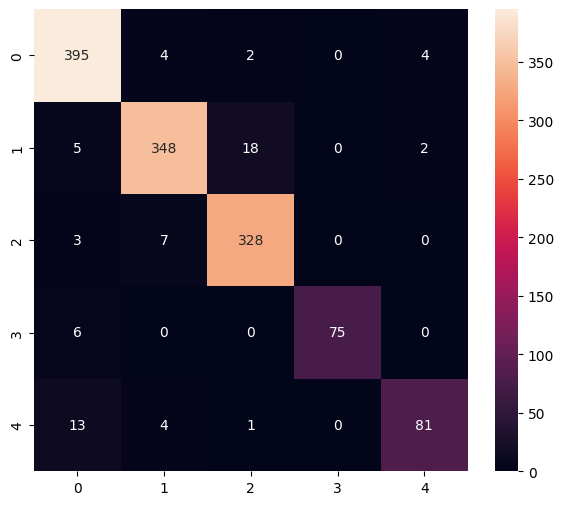

Classification Report
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       405
           1       0.96      0.93      0.95       373
           2       0.94      0.97      0.95       338
           3       1.00      0.93      0.96        81
           4       0.93      0.82      0.87        99

    accuracy                           0.95      1296
   macro avg       0.95      0.92      0.94      1296
weighted avg       0.95      0.95      0.95      1296



In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [68]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

c:\Users\rohan\AppData\Local\Programs\Python\Python38\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [69]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\rohan\AppData\Local\Temp\tmp_yaoqdmg\assets


INFO:tensorflow:Assets written to: C:\Users\rohan\AppData\Local\Temp\tmp_yaoqdmg\assets


6640

# Inference test

In [70]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [71]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [72]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [73]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 0 ns


In [74]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[3.1207865e-01 2.8958930e-02 7.4779957e-05 6.5888762e-01 7.1234876e-12]
3
